#Exploratry data analysis 


TODO- To talk about the dataset and EDA
      source-kaggle.
      

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od

download_url = 'https://www.kaggle.com/rohanrao/nifty50-stock-market-data'

od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chiragkumarprajapat
Your Kaggle Key: ··········


 43%|████▎     | 8.00M/18.4M [00:00<00:00, 82.2MB/s]

100%|██████████| 18.4M/18.4M [00:00<00:00, 43.5MB/s]


In [4]:
data_file="./nifty50-stock-market-data/BAJAJ-AUTO.csv"

Data preparation and cleaning
1. Loading file using pandas
2. We will see some info about data
3. If there any incorrect value or missing value will fix that

In [5]:
#importing libraries
import pandas as pd


In [6]:
#reading the data into dataframes
df= pd.read_csv(data_file)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJ-AUTO,EQ,2101.05,898.00,898.00,551.35,600.25,604.75,624.61,3972485,2.481245e+14,NaN,1202933,0.3028
1,2008-05-27,BAJAJ-AUTO,EQ,604.75,624.70,639.00,580.30,595.50,593.15,606.43,1751063,1.061901e+14,NaN,369389,0.2110
2,2008-05-28,BAJAJ-AUTO,EQ,593.15,561.65,621.90,561.65,605.10,608.15,608.75,1652355,1.005877e+14,NaN,898602,0.5438
3,2008-05-29,BAJAJ-AUTO,EQ,608.15,619.40,619.40,576.00,600.00,599.45,600.98,669269,4.022165e+13,NaN,449951,0.6723
4,2008-05-30,BAJAJ-AUTO,EQ,599.45,605.40,607.00,538.00,576.25,571.70,565.55,1262117,7.137937e+13,NaN,936432,0.7420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2021-04-26,BAJAJ-AUTO,EQ,3672.50,3682.20,3749.00,3676.00,3739.00,3738.85,3719.79,480016,1.785560e+14,36835.0,155563,0.3241
3198,2021-04-27,BAJAJ-AUTO,EQ,3738.85,3738.85,3798.00,3727.20,3795.00,3785.50,3764.89,518487,1.952048e+14,47765.0,140987,0.2719
3199,2021-04-28,BAJAJ-AUTO,EQ,3785.50,3810.05,3954.00,3807.00,3887.15,3889.75,3909.99,1252958,4.899048e+14,78857.0,190766,0.1523
3200,2021-04-29,BAJAJ-AUTO,EQ,3889.75,3943.00,3954.30,3807.10,3818.95,3836.45,3880.32,1335444,5.181950e+14,92106.0,168500,0.1262


In [7]:
#columns on which we are working in
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [8]:
#some more information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [9]:
#through this command we can see the mean, max, min and other details
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3202.000000,3.202000e+03,3.202000e+03,2456.000000,3.202000e+03,3202.000000
mean,2189.871065,2191.537883,2219.934510,2162.215209,2190.307917,2190.412196,2191.294288,4.114639e+05,9.644024e+13,27487.876629,1.944837e+05,0.509401
std,774.552766,776.148452,781.289529,770.192017,775.065896,775.095766,775.657353,3.911067e+05,1.174628e+14,19453.983219,1.707922e+05,0.172869
min,301.900000,262.000000,307.050000,262.000000,300.000000,301.900000,301.980000,4.966000e+03,2.497018e+11,451.000000,1.290000e+03,0.073000
25%,1661.925000,1663.250000,1693.775000,1636.362500,1660.512500,1661.925000,1664.845000,2.054658e+05,4.228246e+13,16041.250000,9.553850e+04,0.391225
50%,2269.950000,2270.000000,2305.575000,2240.250000,2270.750000,2270.225000,2269.900000,3.125365e+05,6.885321e+13,22822.000000,1.537390e+05,0.520000
75%,2808.437500,2810.000000,2834.950000,2778.362500,2808.975000,2808.487500,2808.565000,5.000315e+05,1.107763e+14,32952.250000,2.456250e+05,0.626675
max,4237.450000,4260.000000,4361.400000,4200.000000,4236.000000,4237.450000,4260.500000,8.537143e+06,3.436565e+15,398043.000000,4.154492e+06,1.000000


In [10]:
numerical_datatype=['int16','int32','int64','float16','float32','float64']
numeric_df = df.select_dtypes(include=numerical_datatype)
len(numeric_df.columns)

12

Percentage of missing values in data


In [11]:
#searching for missing value in percentage
missing_percentage=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentage

Trades                0.232979
%Deliverble           0.000000
Deliverable Volume    0.000000
Turnover              0.000000
Volume                0.000000
VWAP                  0.000000
Close                 0.000000
Last                  0.000000
Low                   0.000000
High                  0.000000
Open                  0.000000
Prev Close            0.000000
Series                0.000000
Symbol                0.000000
Date                  0.000000
dtype: float64

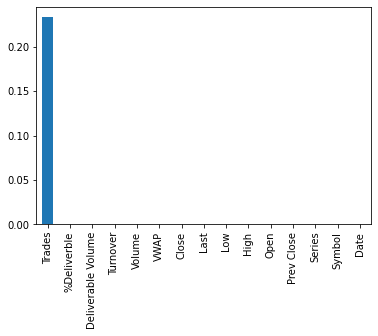

In [12]:
#missing value percentage using barchart
missing_percentage.plot(kind='bar')

EXPLORATRY ANALYSIS AND VISUALIZATION

Columns which are going to be analyzed:
1. Volume
2. Trades
3. Turnover
4. Date for analysing over year analysis
5. High and Low


In [14]:
df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [15]:
a=df.Series.unique()
len(a)

1

#Volume

In [16]:
#importing seaborn libaray for better visualization of data
import seaborn as sns
sns.set_style("darkgrid")

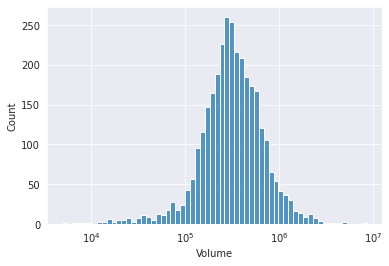

In [18]:
#volume column histogram represents most of the volume of comapny is between 10^5 to 10^6
sns.histplot(df.Volume, log_scale=True)

In [19]:
volumes=df.Volume.value_counts()
len(volumes)

3196

In [44]:
#checking for higher volumes and lower volumes that company got
high_volume=df.Volume[df.Volume>=500000]
low_volume=df.Volume[df.Volume<200000]

In [45]:
len(high_volume)/len(volumes)

0.25062578222778475

In [46]:
len(low_volume)/len(volumes)

0.23842302878598248

#Trades

In [47]:
df.Trades.fillna(0).astype(int)

0           0
1           0
2           0
3           0
4           0
        ...  
3197    36835
3198    47765
3199    78857
3200    92106
3201    79430
Name: Trades, Length: 3202, dtype: int64

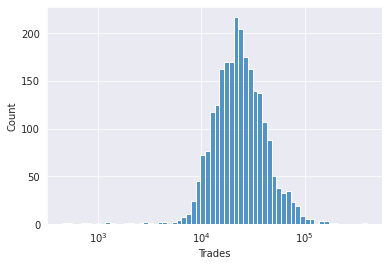

In [48]:
#Trades column histogram represents most of the trades of comapny is between 10^4 to 10^6
sns.histplot(df.Trades, log_scale=True)


In [49]:
Trades_count=df.Trades.value_counts()
len(Trades_count)

2397

In [65]:
high_trades=df.Trades[df.Trades>=50000]
low_trades=df.Trades[df.Trades<5000]

In [66]:
len(high_trades)/len(Trades_count)

0.0851063829787234

In [67]:
len(low_trades)/len(Trades_count)

0.007509386733416771

#TURNOVER

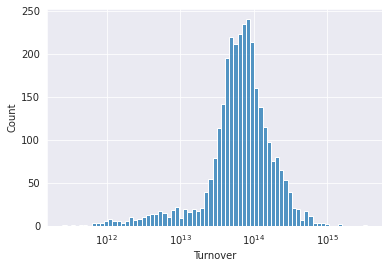

In [68]:
#visualization of turnover of the company
sns.histplot(df.Turnover, log_scale=True)

In [69]:
highest_turnover=df.Trades.max()
highest_turnover

398043.0

In [70]:
lowest_turnover=df.Trades.min()
lowest_turnover

451.0

#DATE

In [71]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekdays'] = df['Date'].dt.dayofweek
df['Months'] = df['Date'].dt.strftime('%b')

In [72]:
#sns.histplot(df.Months, bins=12, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


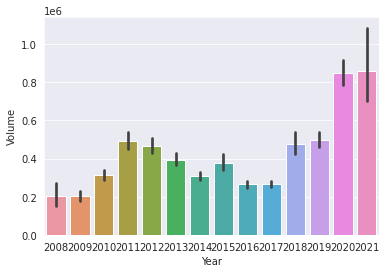

In [73]:
#volumes vs years chart
sns.barplot(df.Year,df.Volume)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


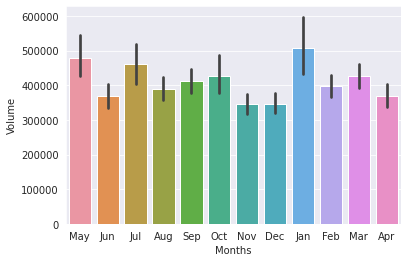

In [74]:
#volumes vs months chart
sns.barplot(df.Months,df.Volume)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


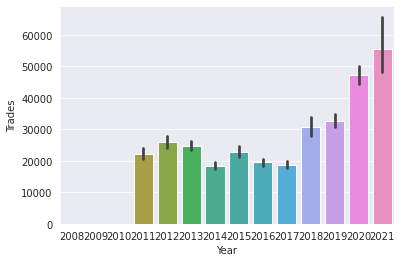

In [75]:
#Trades vs years chart
sns.barplot(df.Year,df.Trades)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


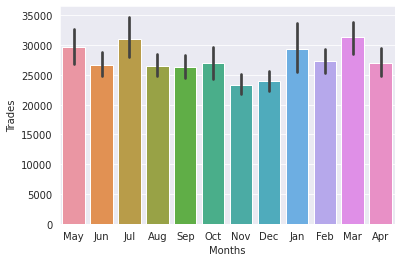

In [76]:
#Trades vs months chart
sns.barplot(df.Months,df.Trades)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


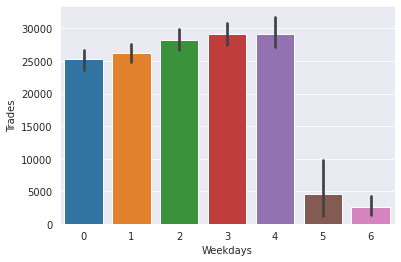

In [77]:
#Trades vs weekdays chart
sns.barplot(df.Weekdays,df.Trades)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


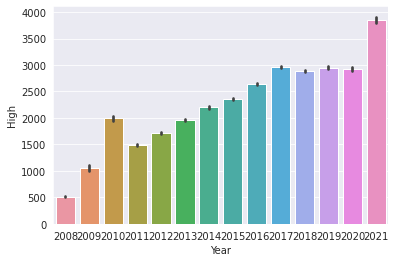

In [78]:
#highest opening price of day over year analysis
sns.barplot(df.Year,df.High)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


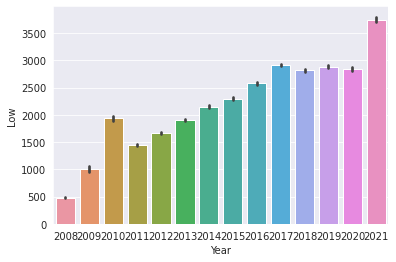

In [79]:
#lowest opening price of day over year analysis
sns.barplot(df.Year,df.Low)

#RESULTS

Questions that came during analysis

1. which is the most trading day?
2. which month we had seen trading all time high?
3. what is the trend of trading year over year?
2. what is the highest and lowest turnover?
3. highest and lowest volume days?


SUMMARY AND CONCLUSION

Insights:

*   The days when volume was greater than 5,00,000 on basis of everdays volume is 25.06%.
*   The days when volume was less than 1,00,000 on basis of everdays volume is 23.84%.
*   The days when No. of trades was greater than 50,000 on basis of everdays is 8.5%.
*   The days when No. of trades was less than 5,000 on basis of everdays is 7.5%.
*   Usually after analysis we can say most trading days are from monday to friday. There is usually less or no to trading on saturdays and sundays.
*   We have seen the most trading on basis of months after the analysis is almost equal for all months or we can say that small difference will be there.
*   Talking about the trend of trading on basis of years, we can say that it has only increasd and for till now with analysis we can say that 2021 year is the most trading year til now.
*   Highest turnover of the company = 398043.0
*   Lowest turnover of the company = 451.0
*  Talking about volume, company has as increasd earlier after that for some years it is decreased but after that it has only increased and from analysis we can say 2020 and 2021 has the most of it.
*   All months are mostly happening month for volumes of the company.Still we can say January is best.
*   Highest opening price and lowest opening price of the years was between 2021.













